# Importando bibliotecas

In [184]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Baixando e tratando os dados

In [2]:
padrao = re.compile(r'txt')

In [3]:
texto = []
for p in os.listdir(path='./genius'):
    if not re.search(padrao,p):
        for txt in os.listdir(path=f'./genius/{p}'):
            if re.search(padrao,txt):
                with open(f'./genius/{p}/{txt}', 'r', encoding = 'utf-8') as ep:
                    for ln in ep.read().split('\n'):
                        texto.append(ln)

In [4]:
len(texto)

68166

In [5]:
# Criando o DF
df = pd.DataFrame(texto, columns=['texto'])
# Limpando linhas vazias
df.dropna(inplace=True)
df.drop(df[df['texto']==''].index, inplace=True)
df.reset_index(drop=True, inplace=True)
# Criando a coluna para identificar as conversas
df['conversa'] = df['texto'].apply(lambda x: 1 if ':' in x else 0)

In [6]:
# Criando a coluna para identificar cada cena
c=0
cenas = []
for i in range(len(df)):
    c += 1 if df.iloc[i,1] == 0 else 0
    cenas.append(c)

df['cena'] = cenas

In [7]:
# Separando o nome dos personagens
df['personagem'] = df[df['conversa']==1]['texto'].str.split(':')
df['personagem'] = df['personagem'].apply(lambda x: x[0] if type(x) == type(list()) else None)

In [8]:
df.describe()

,conversa,cena
count,35884.000000,35884.000000
mean,0.733893,4468.735732
std,0.441927,2695.200149
min,0.000000,1.000000
25%,0.000000,2160.750000
50%,1.000000,4316.500000
75%,1.000000,6699.000000
max,1.000000,9549.000000


In [9]:
df['cena'].value_counts()

5613    48
156     47
294     45
5931    45
2036    45
        ..
5278     1
5279     1
5283     1
5287     1
9549     1
Name: cena, Length: 9549, dtype: int64

# Início da criação dos grafos

In [200]:
import networkx as nx

In [201]:
lista_personagens = list(df['personagem'].str.strip().drop_duplicates())
lista_personagens.pop(0)
len(lista_personagens)

952

In [202]:
padrao = re.compile('\(|\)')

In [203]:
c=0
for i in lista_personagens:
    resultado = re.search(padrao,i)
    if resultado:
        c+=1        
print(f'{c} personagem com parênteses')

164 personagem com parênteses


In [204]:
while c != 0:
    c=0
    for i in range(len(lista_personagens)):
        if i >= len(lista_personagens): break
        x = lista_personagens[i]
        resultado = re.search(padrao,x)
        if resultado or '[' in x or ']' in x or '"' in x or "CUT" in x or "WOMAN" in x or "MAN" in x or "SOLDIER" in x: 
            lista_personagens.pop(i)
            i-=2
            c+=1

    print(f'{c} linhas apagadas.')

150 linhas apagadas.
64 linhas apagadas.
18 linhas apagadas.
4 linhas apagadas.
0 linhas apagadas.


In [205]:
lista_personagens.sort()
len(lista_personagens)

716

In [206]:
index_personagens = [x for x in range(len(lista_personagens))]
len(index_personagens)

716

In [207]:
G = nx.Graph()

In [208]:
G.add_nodes_from(index_personagens)
print(G)

Graph with 716 nodes and 0 edges


In [209]:
edges = []
for i in range(df['cena'].max()):
    pers = []
    for p in df[df['cena']==i]['personagem'].drop_duplicates():
        pers.append(p) if p in lista_personagens else None
    
    if len(pers) > 0:
        for x in pers:
            for y in pers:
                edges.append((lista_personagens.index(x), lista_personagens.index(y))) if x != y else None

len(edges)

13592

In [211]:
G.add_edges_from(edges)

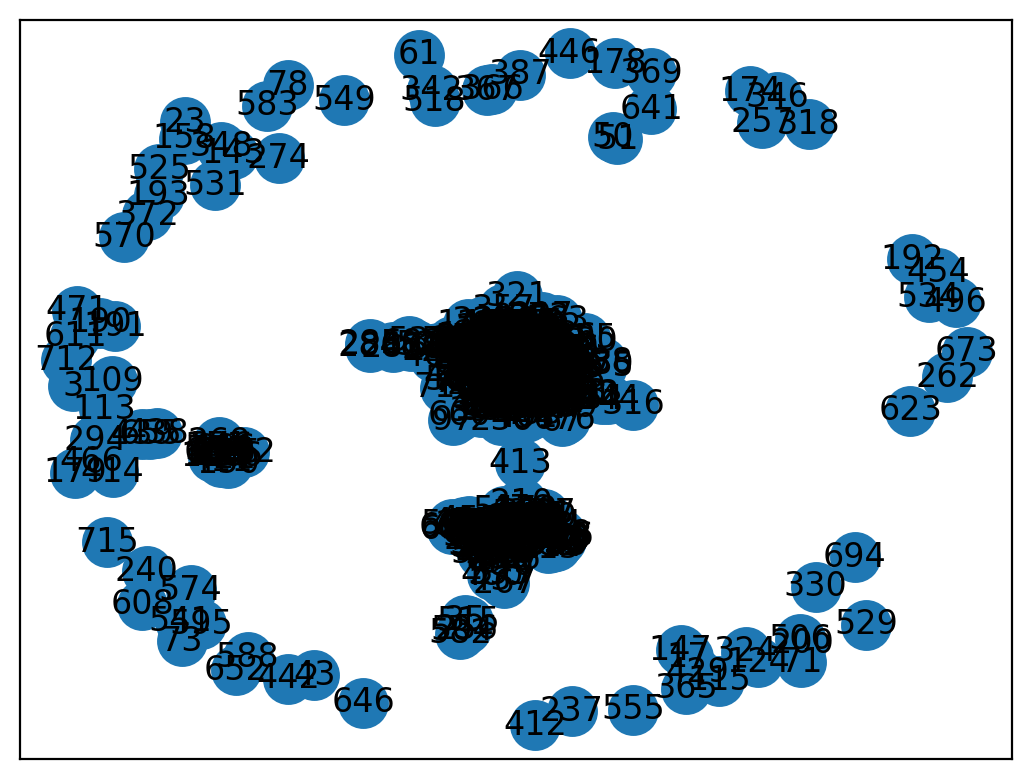

In [213]:
plt.figure(dpi=200)
nx.draw_networkx(G)